## Predicting Heart Disease Using Machine Learning

More specifically, we'll look at the following topics.

1. Exploratory data analysis (EDA) - the process of going through a dataset and finding out more about it.
2. Model training - create model(s) to learn to predict a target variable based on other variables.
3. Model evaluation - evaluating a models predictions using problem-specific evaluation metrics.
4. Model comparison - comparing several different models to find the best one.
5. Model fine-tuning - once we've found a good model, how can we improve it?
6. Feature importance - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
7. Cross-validation - if we do build a good model, can we be sure it will work on unseen data?
8. Reporting what we've found - if we had to present our work, what would we show someone?

### Preparing the tools for the project

In [1]:
# General EDA and plotting libraries
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evalutation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Loading Data

In [12]:
file_location = 'data/heart-disease.csv'
df = pd.read_csv(file_location)
df.shape

(303, 14)

### 1. Exploratory Data Analysis (Data Exploration) 
A short checklist to perform EDA:
1. What question(s) are you trying to solve?
2. What kind of data do you have and how do you treat different types.
3. What's missing from the data and how do you deal with it?
4. Where are the outliers why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
# check top and bottom records of your data
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# see how many positive (1) & negative (0) are in your target variable. We'll use `.value_counts()` for this.
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

As these values i.e 1 & 0 are close to each other. So we can say that our dataset is `Balanced`. `Unbalanced` dataset have far more samples of one class than other.

In [6]:
# check percentage values of your target variable
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

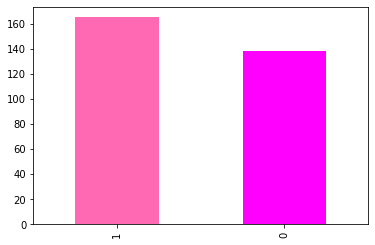

In [7]:
# Let's plot target variable
df.target.value_counts().plot(kind='bar', color=['hotpink', 'magenta']);

`df.info()` shows a quick insight to the number of missing values you have and what type of data your working with.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


currently we don't have any missing values in our dataset. Usually, this is not the case. 99% of the times we do have missing values in our dataset

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


compare two columns to each other with the function
`pd.crosstab(column_1, column_2)`.

In [10]:
# comparing target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


what we can infer form this table? Out of 96 (24+72) females (0), 72 of them have heart disease & 93 of males have heart disease. 

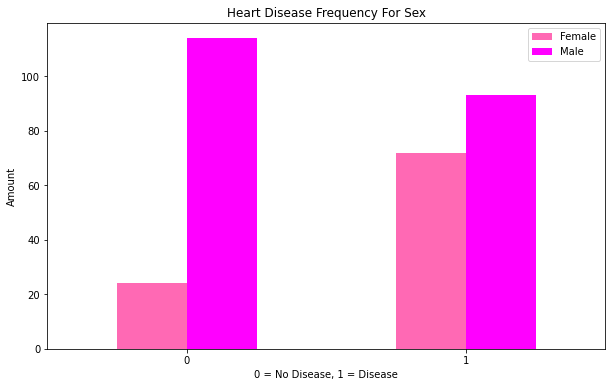

In [11]:
# Let's plot the graph for the same
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10,6), color=['hotpink', 'magenta'])

plt.title('Heart Disease Frequency For Sex')
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);